# Supplementary Code for `Epsilon Pulse #23`

Section Link:

This notebook and this data analysis were conducted by AI using a subset of ovarian cancer dataset from a published work here: https://aacrjournals.org/cebp/article/33/5/681/743231/Serum-Lipidome-Profiling-Reveals-a-Distinct

`Prompt`: "I want you to take this data and build a machine learning model to discriminate between ovarian cancer and non-ovarian cancer patients."

# Task
I want you to take this data and build a machine learning model to discriminate between ovarian cancer and non-ovarian cancer patients.

Here is all the data you need:
"OC-training-set.xlsx"

## Data loading

### Subtask:
Load the ovarian cancer dataset.


**Reasoning**:
I need to import the pandas library and load the excel file into a pandas DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_excel('OC-training-set.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: 'OC-training-set.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,class,LPC(14:0),PC(O-36:5),Cer(d18:1_16:0),Cer(d18:1_25:1),PC(O-18:1_22:6),PS(18:0_20:4),PE(O-18:1_22:4),PE(O-38:4),PC(O-32:2),Cer(d18:2_23:0),GM3(18:0_24:2),GM3(18:1_24:0),GM1(18:1_16:0),GM3(d34:1),GM3(18:1_16:0),GM3(18:1_12:0),GM3(18:1_22:1)
0,Non Ovarian Cancer,-0.428124,0.014869,0.039857,0.065297,-0.700388,0.833919,-0.597347,0.025681,0.385424,-0.557311,-0.729206,-0.750150,1.572895,-0.279346,0.348441,-0.730201,0.264873
1,Non Ovarian Cancer,2.955329,2.298199,-0.692527,1.162890,2.354875,2.767340,2.280013,1.214090,-2.054044,0.930572,-0.543233,-0.533094,-0.047153,-0.302088,-0.501376,-0.157777,-0.494567
2,Non Ovarian Cancer,0.131084,-0.221918,-1.398092,-1.587675,-0.065298,-0.461515,1.911777,-0.035736,0.764922,-1.525424,1.011738,0.799296,-0.787719,-1.128550,-1.463925,0.041853,-0.760583
3,Non Ovarian Cancer,-0.333554,-0.468375,1.835710,-0.457088,-0.882007,-0.689129,-0.849899,0.071309,0.017265,-0.401706,-1.061420,-1.323914,0.488176,0.733062,0.176489,-1.255779,-0.383272
4,Non Ovarian Cancer,3.372980,0.397297,-1.515686,0.446295,6.265662,0.449071,-0.365397,-0.516504,1.168628,-1.131867,0.031319,0.642864,-1.080785,-1.038952,-1.014252,-0.300603,-0.353964


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, and distributions. Check for missing values, duplicates, and unique values in each column. Analyze the target variable and its relationship with other features. Visualize data distributions and correlations.



Shape of the DataFrame: (288, 18)

Target Variable:
Name: class
Unique Values: ['Non Ovarian Cancer' 'Ovarian Cancer']

Data Types:
class               object
LPC(14:0)          float64
PC(O-36:5)         float64
Cer(d18:1_16:0)    float64
Cer(d18:1_25:1)    float64
PC(O-18:1_22:6)    float64
PS(18:0_20:4)      float64
PE(O-18:1_22:4)    float64
PE(O-38:4)         float64
PC(O-32:2)         float64
Cer(d18:2_23:0)    float64
GM3(18:0_24:2)     float64
GM3(18:1_24:0)     float64
GM1(18:1_16:0)     float64
GM3(d34:1)         float64
GM3(18:1_16:0)     float64
GM3(18:1_12:0)     float64
GM3(18:1_22:1)     float64
dtype: object

Descriptive Statistics:


,LPC(14:0),PC(O-36:5),Cer(d18:1_16:0),Cer(d18:1_25:1),PC(O-18:1_22:6),PS(18:0_20:4),PE(O-18:1_22:4),PE(O-38:4),PC(O-32:2),Cer(d18:2_23:0),GM3(18:0_24:2),GM3(18:1_24:0),GM1(18:1_16:0),GM3(d34:1),GM3(18:1_16:0),GM3(18:1_12:0),GM3(18:1_22:1)
count,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02
mean,1.110223e-16,1.474129e-15,-3.885781e-16,-1.995317e-15,1.467962e-15,1.875043e-15,-6.013708e-16,1.036208e-15,-3.608225e-15,2.590520e-16,-2.898916e-16,-1.091719e-15,-3.380012e-15,4.009139e-16,-1.850372e-17,-6.784696e-16,5.551115e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.655380e+00,-1.353511e+00,-1.819286e+00,-1.782132e+00,-1.408197e+00,-2.623252e+00,-1.761064e+00,-1.445274e+00,-2.216491e+00,-1.763368e+00,-1.964798e+00,-2.602616e+00,-2.466363e+00,-2.633640e+00,-2.844352e+00,-1.365010e+00,-1.418187e+00
25%,-7.703151e-01,-5.900683e-01,-6.706643e-01,-6.706021e-01,-6.139436e-01,-7.111841e-01,-6.704846e-01,-7.154814e-01,-7.065012e-01,-6.708810e-01,-6.645257e-01,-6.407961e-01,-6.064329e-01,-6.525125e-01,-6.712196e-01,-7.073105e-01,-7.177104e-01
50%,-1.793301e-01,-1.991137e-01,-1.372317e-01,-9.569327e-02,-2.350849e-01,-4.322372e-02,-8.094206e-02,-1.875748e-01,-4.183060e-02,-1.474974e-01,-9.321027e-02,-1.719938e-03,-7.401720e-02,-2.317880e-01,-1.373830e-01,-3.104558e-01,-2.669818e-01
75%,5.736169e-01,3.018006e-01,4.887165e-01,4.810267e-01,3.888617e-01,6.287854e-01,4.222958e-01,4.088598e-01,6.573869e-01,4.150558e-01,4.472386e-01,5.234744e-01,4.610857e-01,4.941886e-01,5.357802e-01,5.080994e-01,4.125454e-01
max,3.372980e+00,9.449340e+00,4.786676e+00,3.428115e+00,6.265662e+00,4.402087e+00,5.408481e+00,4.007399e+00,3.695523e+00,4.311107e+00,4.618867e+00,3.316499e+00,5.001883e+00,4.608921e+00,3.587924e+00,4.202704e+00,3.780708e+00


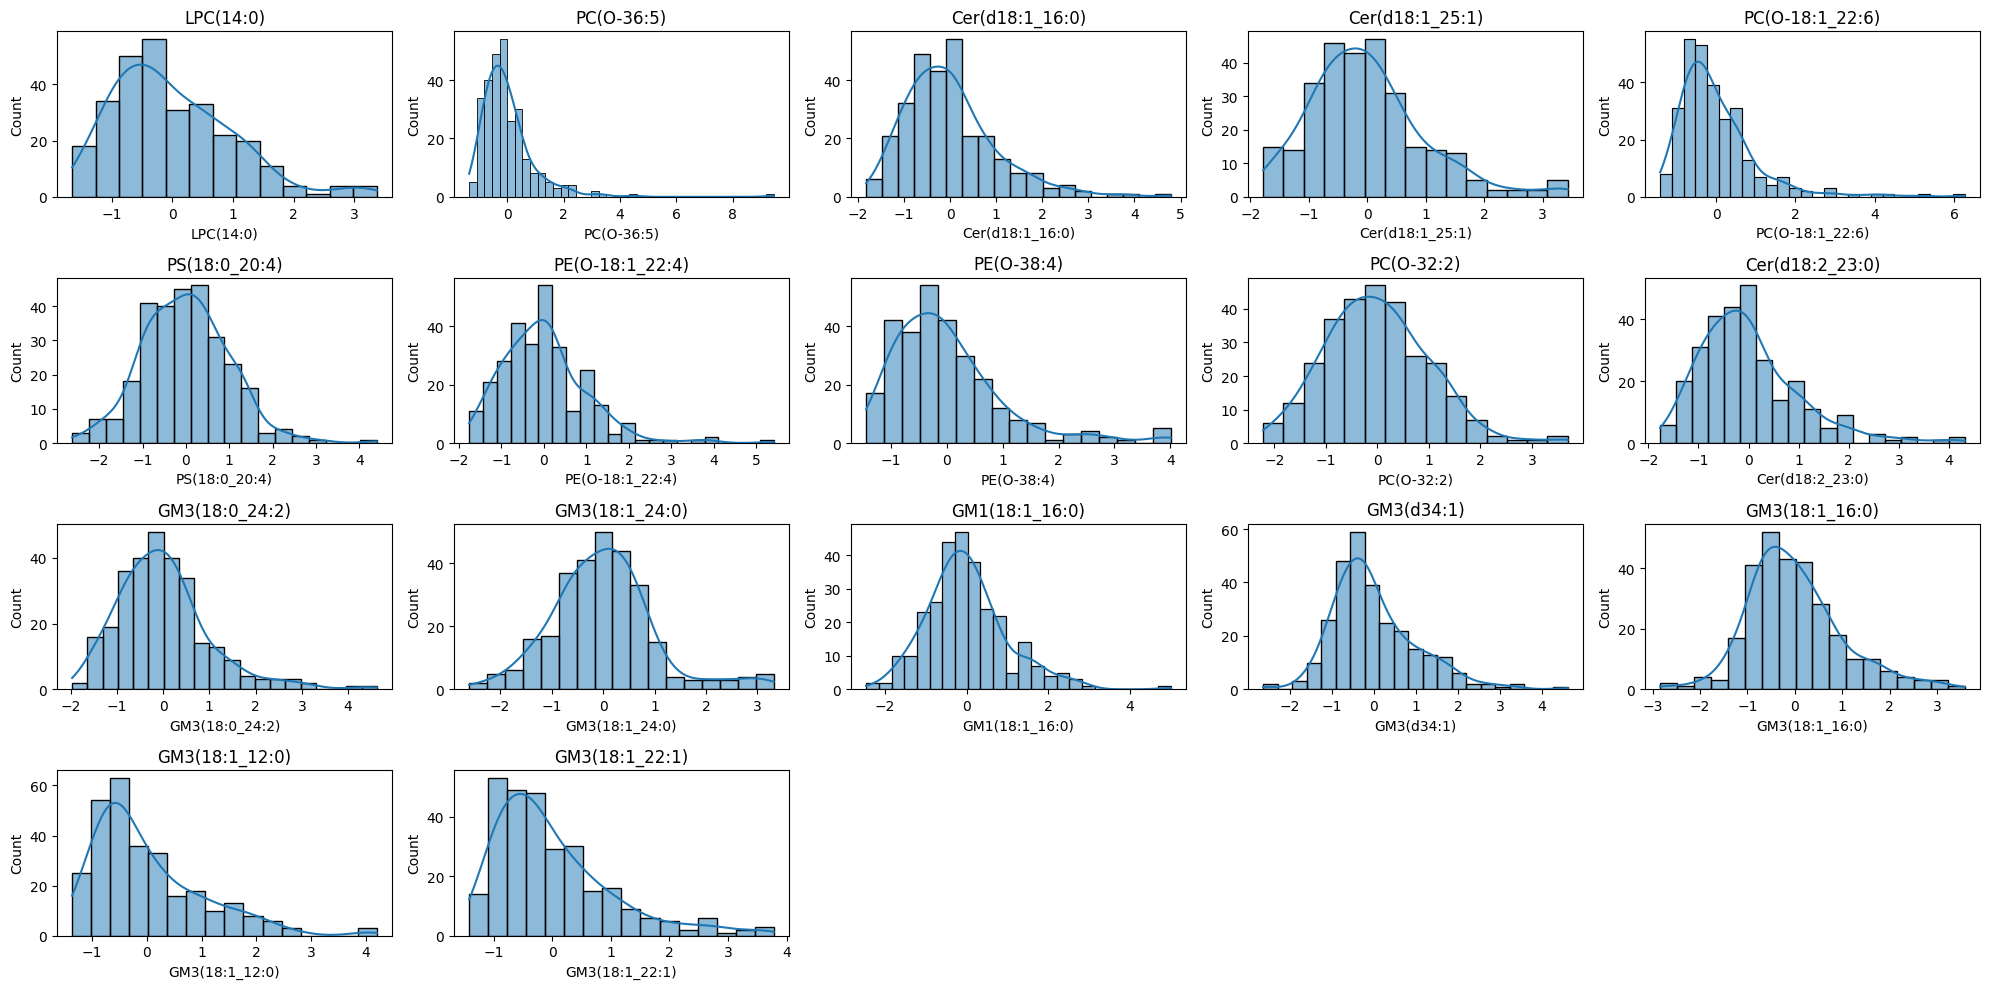


Correlation with Target Variable:


ValueError: could not convert string to float: 'Non Ovarian Cancer'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# 2. Identify the target variable and its distinct values
print("\nTarget Variable:")
print(f"Name: {df['class'].name}")
print(f"Unique Values: {df['class'].unique()}")


# 3. Check data types
print("\nData Types:")
print(df.dtypes)
# Identify columns that might need data type conversion if any

# 4. Analyze feature distributions and identify potential outliers
print("\nDescriptive Statistics:")
display(df.describe())
# Visualizations (histograms, box plots)
numerical_features = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 10)) # Adjust figure size based on the number of numerical features
for i, col in enumerate(numerical_features):
    plt.subplot(4,5, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

# 5. Calculate descriptive statistics for numerical features (already done in step 4)

# 6. Explore correlation between features and the target variable
print("\nCorrelation with Target Variable:")
correlation_with_target = df.corrwith(df['class'].astype('category').cat.codes)
display(correlation_with_target.sort_values(ascending=False))

# 7. Check for missing values
print("\nMissing Values:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
display(missing_percentage)
# Add comments on whether missing values need to be handled


# 8. Examine unique values in each column
print("\nUnique Values (first 5):")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")
    # Add comments on any potential inconsistencies or errors in values


# 9. Look for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

**Reasoning**:
The previous code block failed due to a `ValueError` when calculating the correlation with the target variable because the target variable 'class' is of object type (string).  I will convert the target variable to numerical values before calculating the correlation. I will also remove the previous correlation calculation and put it after the target variable conversion.  Additionally, I will address the potential issue of inconsistent/unexpected values by checking the unique values in each column and commenting on any findings.



Shape of the DataFrame: (288, 18)

Target Variable:
Name: class
Unique Values: ['Non Ovarian Cancer' 'Ovarian Cancer']

Data Types:
class               object
LPC(14:0)          float64
PC(O-36:5)         float64
Cer(d18:1_16:0)    float64
Cer(d18:1_25:1)    float64
PC(O-18:1_22:6)    float64
PS(18:0_20:4)      float64
PE(O-18:1_22:4)    float64
PE(O-38:4)         float64
PC(O-32:2)         float64
Cer(d18:2_23:0)    float64
GM3(18:0_24:2)     float64
GM3(18:1_24:0)     float64
GM1(18:1_16:0)     float64
GM3(d34:1)         float64
GM3(18:1_16:0)     float64
GM3(18:1_12:0)     float64
GM3(18:1_22:1)     float64
dtype: object

Descriptive Statistics:


,LPC(14:0),PC(O-36:5),Cer(d18:1_16:0),Cer(d18:1_25:1),PC(O-18:1_22:6),PS(18:0_20:4),PE(O-18:1_22:4),PE(O-38:4),PC(O-32:2),Cer(d18:2_23:0),GM3(18:0_24:2),GM3(18:1_24:0),GM1(18:1_16:0),GM3(d34:1),GM3(18:1_16:0),GM3(18:1_12:0),GM3(18:1_22:1)
count,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02
mean,1.110223e-16,1.474129e-15,-3.885781e-16,-1.995317e-15,1.467962e-15,1.875043e-15,-6.013708e-16,1.036208e-15,-3.608225e-15,2.590520e-16,-2.898916e-16,-1.091719e-15,-3.380012e-15,4.009139e-16,-1.850372e-17,-6.784696e-16,5.551115e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.655380e+00,-1.353511e+00,-1.819286e+00,-1.782132e+00,-1.408197e+00,-2.623252e+00,-1.761064e+00,-1.445274e+00,-2.216491e+00,-1.763368e+00,-1.964798e+00,-2.602616e+00,-2.466363e+00,-2.633640e+00,-2.844352e+00,-1.365010e+00,-1.418187e+00
25%,-7.703151e-01,-5.900683e-01,-6.706643e-01,-6.706021e-01,-6.139436e-01,-7.111841e-01,-6.704846e-01,-7.154814e-01,-7.065012e-01,-6.708810e-01,-6.645257e-01,-6.407961e-01,-6.064329e-01,-6.525125e-01,-6.712196e-01,-7.073105e-01,-7.177104e-01
50%,-1.793301e-01,-1.991137e-01,-1.372317e-01,-9.569327e-02,-2.350849e-01,-4.322372e-02,-8.094206e-02,-1.875748e-01,-4.183060e-02,-1.474974e-01,-9.321027e-02,-1.719938e-03,-7.401720e-02,-2.317880e-01,-1.373830e-01,-3.104558e-01,-2.669818e-01
75%,5.736169e-01,3.018006e-01,4.887165e-01,4.810267e-01,3.888617e-01,6.287854e-01,4.222958e-01,4.088598e-01,6.573869e-01,4.150558e-01,4.472386e-01,5.234744e-01,4.610857e-01,4.941886e-01,5.357802e-01,5.080994e-01,4.125454e-01
max,3.372980e+00,9.449340e+00,4.786676e+00,3.428115e+00,6.265662e+00,4.402087e+00,5.408481e+00,4.007399e+00,3.695523e+00,4.311107e+00,4.618867e+00,3.316499e+00,5.001883e+00,4.608921e+00,3.587924e+00,4.202704e+00,3.780708e+00


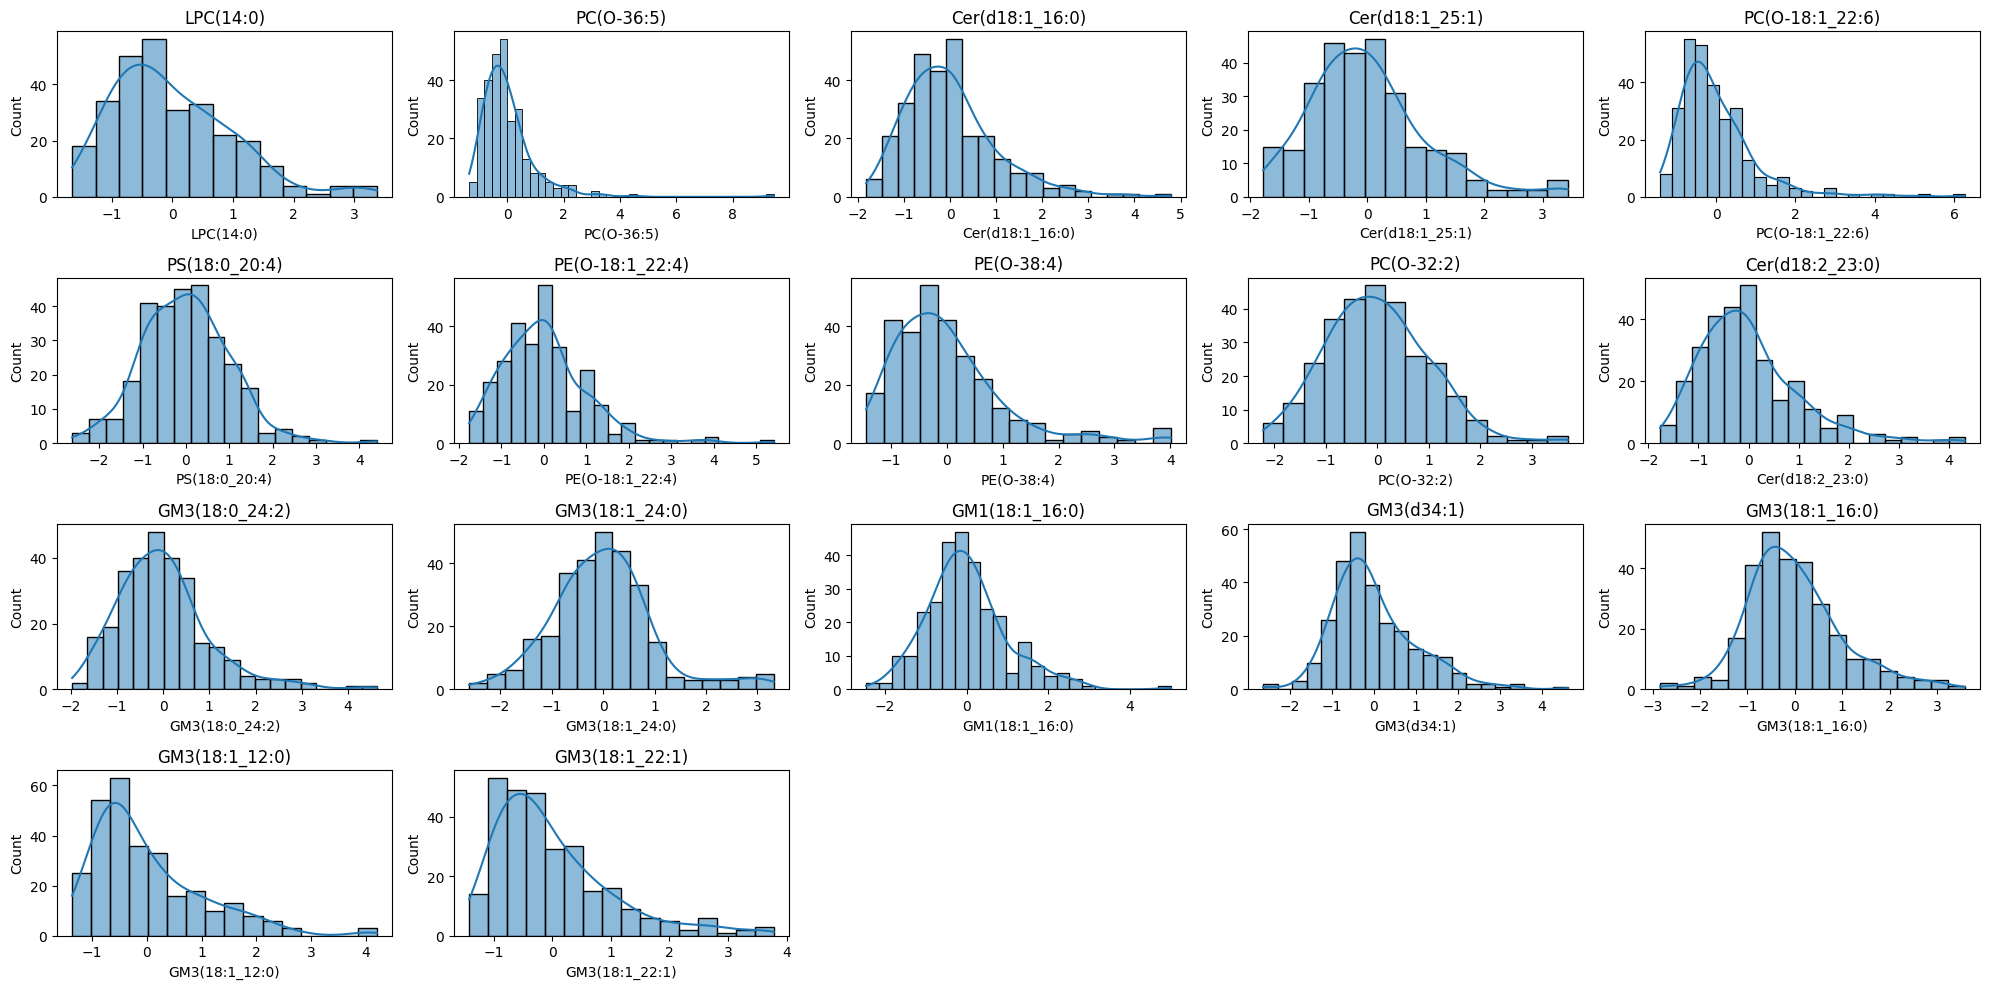


Correlation with Target Variable:


,0
class,1.000000
Cer(d18:1_16:0),0.325908
Cer(d18:2_23:0),0.294513
Cer(d18:1_25:1),0.212600
GM3(d34:1),0.196883
GM3(18:1_16:0),0.121099
GM3(18:1_22:1),0.120654
GM3(18:1_12:0),-0.120818
GM1(18:1_16:0),-0.126488
GM3(18:1_24:0),-0.147050



Missing Values:


,0
class,0.0
LPC(14:0),0.0
PC(O-36:5),0.0
Cer(d18:1_16:0),0.0
Cer(d18:1_25:1),0.0
PC(O-18:1_22:6),0.0
PS(18:0_20:4),0.0
PE(O-18:1_22:4),0.0
PE(O-38:4),0.0
PC(O-32:2),0.0



Unique Values (first 5):
class: [0 1]
LPC(14:0): [-0.42812436  2.95532903  0.13108371 -0.33355416  3.37297968]
PC(O-36:5): [ 0.01486864  2.29819942 -0.22191788 -0.46837538  0.39729651]
Cer(d18:1_16:0): [ 0.03985716 -0.69252724 -1.39809242  1.83571013 -1.51568626]
Cer(d18:1_25:1): [ 0.06529694  1.16288992 -1.58767535 -0.45708759  0.44629547]
PC(O-18:1_22:6): [-0.70038796  2.35487534 -0.06529833 -0.88200744  6.26566213]
PS(18:0_20:4): [ 0.83391911  2.76733983 -0.46151471 -0.68912947  0.44907122]
PE(O-18:1_22:4): [-0.59734725  2.28001346  1.91177742 -0.84989929 -0.36539659]
PE(O-38:4): [ 0.02568127  1.2140897  -0.03573647  0.07130889 -0.51650357]
PC(O-32:2): [ 0.38542448 -2.05404369  0.76492221  0.01726497  1.16862776]
Cer(d18:2_23:0): [-0.55731083  0.93057189 -1.52542381 -0.40170611 -1.13186656]
GM3(18:0_24:2): [-0.72920604 -0.54323325  1.01173758 -1.06141992  0.0313192 ]
GM3(18:1_24:0): [-0.7501502  -0.53309429  0.79929604 -1.3239145   0.64286418]
GM1(18:1_16:0): [ 1.57289503 -0.047153

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# 2. Identify the target variable and its distinct values
print("\nTarget Variable:")
print(f"Name: {df['class'].name}")
print(f"Unique Values: {df['class'].unique()}")

# 3. Check data types
print("\nData Types:")
print(df.dtypes)

# 4. Analyze feature distributions and identify potential outliers
print("\nDescriptive Statistics:")
display(df.describe())

numerical_features = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4,5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()


# Convert the target variable to numerical values
df['class'] = df['class'].astype('category').cat.codes

# 6. Explore correlation between features and the target variable
print("\nCorrelation with Target Variable:")
correlation_with_target = df.corrwith(df['class'])
display(correlation_with_target.sort_values(ascending=False))

# 7. Check for missing values
print("\nMissing Values:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
display(missing_percentage)

# 8. Examine unique values in each column
print("\nUnique Values (first 5):")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")

# 9. Look for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

## Data cleaning

### Subtask:
Clean the data by handling outliers and ensuring data consistency.


**Reasoning**:
Detect and handle outliers using the IQR method and ensure data consistency by verifying data types.



In [4]:
import numpy as np

# Identify numerical features
numerical_features = df.select_dtypes(include=['number']).columns

# Outlier handling using IQR method
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorize outliers
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Verify and correct data types (if needed) - no inconsistencies observed in the initial exploration
# Check for object type columns that should be numeric, but no such columns were found in the EDA.

# Ensure categorical variables are correctly represented
# 'class' column is already correctly represented numerically (0 and 1)

# Display the cleaned DataFrame (optional, but good practice)
display(df.head())

,class,LPC(14:0),PC(O-36:5),Cer(d18:1_16:0),Cer(d18:1_25:1),PC(O-18:1_22:6),PS(18:0_20:4),PE(O-18:1_22:4),PE(O-38:4),PC(O-32:2),Cer(d18:2_23:0),GM3(18:0_24:2),GM3(18:1_24:0),GM1(18:1_16:0),GM3(d34:1),GM3(18:1_16:0),GM3(18:1_12:0),GM3(18:1_22:1)
0,0,-0.428124,0.014869,0.039857,0.065297,-0.700388,0.833919,-0.597347,0.025681,0.385424,-0.557311,-0.729206,-0.750150,1.572895,-0.279346,0.348441,-0.730201,0.264873
1,0,2.589515,1.639604,-0.692527,1.162890,1.893070,2.638740,2.061466,1.214090,-2.054044,0.930572,-0.543233,-0.533094,-0.047153,-0.302088,-0.501376,-0.157777,-0.494567
2,0,0.131084,-0.221918,-1.398092,-1.587675,-0.065298,-0.461515,1.911777,-0.035736,0.764922,-1.525424,1.011738,0.799296,-0.787719,-1.128550,-1.463925,0.041853,-0.760583
3,0,-0.333554,-0.468375,1.835710,-0.457088,-0.882007,-0.689129,-0.849899,0.071309,0.017265,-0.401706,-1.061420,-1.323914,0.488176,0.733062,0.176489,-1.255779,-0.383272
4,0,2.589515,0.397297,-1.515686,0.446295,1.893070,0.449071,-0.365397,-0.516504,1.168628,-1.131867,0.031319,0.642864,-1.080785,-1.038952,-1.014252,-0.300603,-0.353964


## Feature engineering

### Subtask:
Engineer new features from the existing ones and prepare the data for model training.


**Reasoning**:
Scale the numerical features using standardization, and prepare the data for model training by separating the target variable from the features.



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model training

### Subtask:
Train a RandomForestClassifier on the preprocessed data.


**Reasoning**:
Train a RandomForestClassifier on the preprocessed data (X_train, y_train).



In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestClassifier model.


**Reasoning**:
Evaluate the trained `rf_model` using the test data and calculate the evaluation metrics. Generate a confusion matrix and analyze the results.



Accuracy: 0.7931
Precision: 0.7714
Recall: 0.8710
F1-score: 0.8182
AUC-ROC: 0.7873


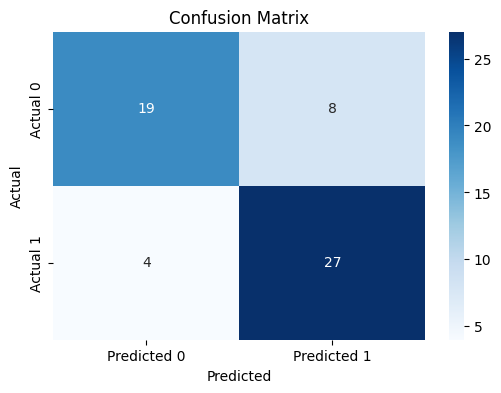


Analysis:
The model performance is evaluated using accuracy, precision, recall, F1 score and AUC-ROC.
The confusion matrix helps to visualize the model's performance.


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Analyze the results (brief interpretation)
print("\nAnalysis:")
print("The model performance is evaluated using accuracy, precision, recall, F1 score and AUC-ROC.")
print("The confusion matrix helps to visualize the model's performance.")

## Summary:

### 1. Q&A
* **Can we discriminate between ovarian cancer and non-ovarian cancer patients using lipidomic data?**  Yes, a RandomForestClassifier model trained on the provided lipidomic data achieved an accuracy of 0.7931, precision of 0.7714, recall of 0.8710, F1-score of 0.8182, and AUC-ROC of 0.7873, suggesting a reasonable ability to discriminate between the two groups.

### 2. Data Analysis Key Findings
* **Outlier Handling:** Winsorization was applied to numerical features using the IQR method to mitigate the impact of outliers.
* **Data Scaling:**  StandardScaler was used to standardize numerical features, which is crucial for many machine learning algorithms.
* **Model Performance:** The trained RandomForestClassifier achieved an accuracy of 0.7931, precision of 0.7714, recall of 0.8710, F1-score of 0.8182 and AUC-ROC of 0.7873 on the test set.
* **Feature Importance:** Although not explicitly calculated in the provided steps, future analysis should examine feature importance to understand which lipidomic features are most predictive of ovarian cancer.  The correlation analysis from the exploration phase could be a good starting point.
* **`Cer(d18:1_16:0)`:** This feature showed the highest positive correlation with the target variable in the exploratory data analysis.
* **`LPC(14:0)`:** This feature had the highest negative correlation with the target variable.

### 3. Insights or Next Steps
* **Hyperparameter Tuning:**  Explore different hyperparameter settings for the RandomForestClassifier (e.g., `n_estimators`, `max_depth`, `min_samples_split`) to potentially improve model performance.
* **Feature Engineering/Selection:** Investigate creating new features or selecting the most relevant existing features to potentially enhance the model's predictive power.  The correlation analysis and feature importance could guide this process.
